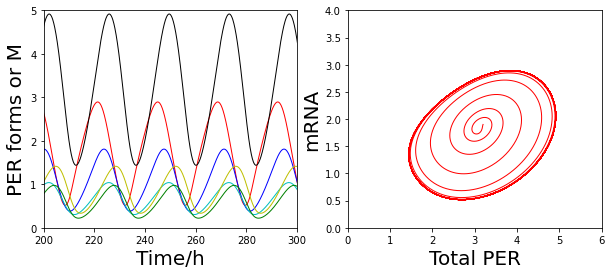

In [6]:
import pylab as pl

# some parameters
vs = 0.76
vm = 0.65
vd = 0.95
ks = 0.38
k1 = 1.9
k2 = 1.3
v1 = 3.2
v2 = 1.58
v3 = 5.0
v4 = 2.5
K1 = 2.0
K2 = 2.0
K3 = 2.0
K4 = 2.0
Ki = 1.0
Km = 0.5
Kd = 0.2

# Initialization ...
t = 0.0
dt = 0.1
n = 10000
M = 1.9
P0 = 0.8
P1 = 0.8
P2 = 0.8
Pn = 0.8

# Defining functions....
def fM(M, Pn):
    freturn = vs * Ki**4/(Ki**4 + Pn**4) - vm * M/(Km + M)
    return freturn

def fP0(M, P0, P1):
    freturn = ks * M - v1 * P0/(K1 + P0) + v2 * P1/(K2 + P1)
    return freturn

def fP1(P0, P1, P2):
    freturn = v1 * P0/(K1 + P0) - v2 * P1/(K2 + P1) - v3 * P1/(K3 + P1) + v4 * P2/(K4 + P2)
    return freturn

def fP2(P1, P2, Pn):
    freturn = v3 * P1/(K3+ P1) - v4 * P2/(K4 + P2) - k1 * P2 + k2 * Pn -vd * P2/(Kd + P2)
    return freturn
    
def fPn(P2, Pn):
    freturn = k1 * P2 - k2 * Pn
    return freturn

#Defining empty list
MT = []
P0T = []
P1T = []
P2T = []
PnT = []
PtT = []
Time = []

# 4th order R-K
for i in range(n):
    k1_m = fM(M, Pn)
    k1_0 = fP0(M, P0, P1)
    k1_1 = fP1(P0, P1, P2)
    k1_2 = fP2(P1, P2, Pn)
    k1_n = fPn(P2, Pn)
    
    k2_m = fM(  M+k1_m*dt/2, Pn+k1_n*dt/2)
    k2_0 = fP0( M+k1_m*dt/2, P0+k1_0*dt/2, P1+k1_1*dt/2) 
    k2_1 = fP1(P0+k1_0*dt/2, P1+k1_1*dt/2, P2+k1_2*dt/2)
    k2_2 = fP2(P1+k1_1*dt/2, P2+k1_2*dt/2, Pn+k1_n*dt/2)
    k2_n = fPn(P2+k1_2*dt/2, Pn+k1_n*dt/2)

    k3_m = fM(  M+k2_m*dt/2, Pn+k2_n*dt/2)
    k3_0 = fP0( M+k2_m*dt/2, P0+k2_0*dt/2, P1+k2_1*dt/2)
    k3_1 = fP1(P0+k2_0*dt/2, P1+k2_1*dt/2, P2+k2_2*dt/2)
    k3_2 = fP2(P1+k2_1*dt/2, P2+k2_2*dt/2, Pn+k2_n*dt/2)
    k3_n = fPn(P2+k2_2*dt/2, Pn+k2_n*dt/2)

    k4_m = fM(  M+k3_m*dt, Pn+k3_n*dt)
    k4_0 = fP0( M+k3_m*dt, P0+k3_0*dt, P1+k3_1*dt)
    k4_1 = fP1(P0+k3_0*dt, P1+k3_1*dt, P2+k3_2*dt)
    k4_2 = fP2(P1+k3_1*dt, P2+k3_2*dt, Pn+k3_n*dt)
    k4_n = fPn(P2+k3_2*dt, Pn+k3_n*dt)

    M =M +dt/6.*(k1_m+2*k2_m+2*k3_m+k4_m)
    P0=P0+dt/6.*(k1_0+2*k2_0+2*k3_0+k4_0)
    P1=P1+dt/6.*(k1_1+2*k2_1+2*k3_1+k4_1)
    P2=P2+dt/6.*(k1_2+2*k2_2+2*k3_2+k4_2)
    Pn=Pn+dt/6.*(k1_n+2*k2_n+2*k3_n+k4_n)
    Pt = P0 + P1 + P2 + Pn
    t=t+dt
    
    MT.append(M)
    P0T.append(P0)
    P1T.append(P1)
    P2T.append(P2)
    PnT.append(Pn)
    PtT.append(Pt)
    Time.append(t)

fig = pl.figure(figsize=(10,4))
ax1 =fig.add_subplot(1,2,1)
ax2 =fig.add_subplot(1,2,2)

ax1.plot(Time, MT, 'r-', label='M',linewidth=1.0)
ax1.plot(Time, P0T, 'b-', label='M',linewidth=1.0)
ax1.plot(Time, P1T, 'c-', label='M',linewidth=1.0)
ax1.plot(Time, P2T, 'g-', label='M',linewidth=1.0)
ax1.plot(Time, PnT, 'y-', label='M',linewidth=1.0)
ax1.plot(Time, PtT, 'k-', label='M',linewidth=1.0)

ax2.plot(PtT, MT, 'r-', label='phase',linewidth=1.0)

ax1.set_ylabel(r'PER forms or M', fontsize=20)
ax1.set_xlabel(r'Time/h', fontsize=20)
ax1.set_xlim(200,300)
ax1.set_ylim(0,5)


ax2.set_ylabel(r'mRNA', fontsize=20)
ax2.set_xlabel(r'Total PER', fontsize=20)
ax2.set_xlim(0,6)
ax2.set_ylim(0,4)
pl.show()
